In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("Advertising.csv")
data.drop(columns=data.columns[0], inplace=True)

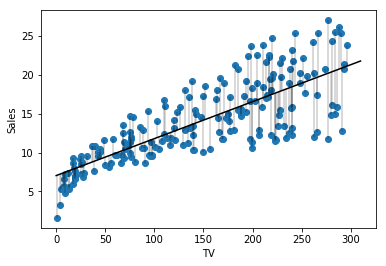

In [4]:
sales = data['sales']
TV = np.array(data['TV'])
TV = TV[:, np.newaxis]

reg = LinearRegression().fit(TV, sales)

x = np.linspace(0, 310, 10)

def f(x):
    return reg.coef_ * x + reg.intercept_

y = f(x)

plt.scatter(TV, sales)
plt.plot(x, y, c='black')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.vlines(TV, sales, f(TV), alpha=0.2) 

In [5]:
def rss(y, x, beta_0, beta_1):
    pred = beta_0 + beta_1 * x
    return sum((y - pred) ** 2)

rss(y=sales, x=data['TV'], beta_0=reg.intercept_, beta_1=reg.coef_)

rss(y=sales, x=data['TV'], beta_0=5, beta_1=0.02)

10612.063755999998

In [6]:
x = np.arange(5, 9.5, 0.1)
y = np.arange(0.02, 0.08, 0.001)

beta_0, beta_1 = np.meshgrid(x, y)



beta_x = beta_0[:, :, np.newaxis]
beta_y = beta_1[:, :, np.newaxis]
TV = np.array(data['TV'])
#(beta_0 + beta_1 * TV).shape

sales = np.array(data['sales'])
true = np.ones((len(y), len(x), 200))
for i in range(200):
    true[:, :, i] = true[:, :, i] * sales[i]

result = np.sum((true - (beta_x + beta_y * TV)) ** 2, axis=2) /10000
result
#plt.contour(beta_0, beta_1, result)

array([[1.06120638, 1.03707978, 1.01335318, ..., 0.39228918, 0.38496258,
        0.37803598],
       [1.01793679, 0.99439836, 0.97125993, ..., 0.37372273, 0.3669843 ,
        0.36064587],
       [0.97582543, 0.95287517, 0.93032491, ..., 0.35631451, 0.35016425,
        0.34441399],
       ...,
       [0.44336516, 0.45276425, 0.46256334, ..., 1.18252694, 1.20872603,
        1.23532512],
       [0.46611432, 0.47610158, 0.48648884, ..., 1.22997924, 1.2567665 ,
        1.28395376],
       [0.49002172, 0.50059715, 0.51157258, ..., 1.27858978, 1.30596521,
        1.33374064]])

Text(0,0.5,'Y')

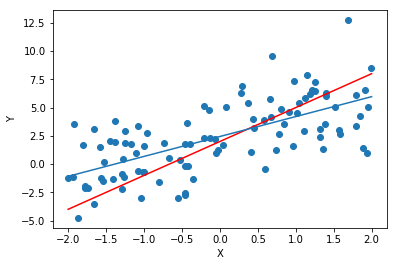

In [36]:
from scipy.stats import norm, uniform

def f(x):
    return 2 + 2*x + norm(loc=0, scale=2.5).rvs()

X = uniform(loc=-2, scale=4).rvs(size=100)
X = X[:, np.newaxis]
Y = np.array(list(map(f, X)))

x = np.linspace(-2, 2., 10)
y = 2 + 3 * x

reg = LinearRegression().fit(X, Y)
y_head = reg.intercept_ + reg.coef_.squeeze() * x

plt.scatter(X, Y)
plt.plot(x, y, color='red')
plt.plot(x, y_head)
plt.xlabel('X')
plt.ylabel('Y')    

<IPython.core.display.Javascript object>


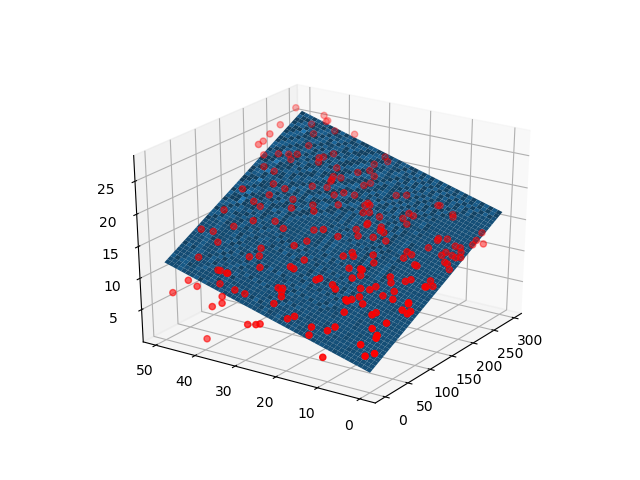

In [7]:
from mpl_toolkits.mplot3d import Axes3D

predictor = data[['TV', 'radio']]

reg = LinearRegression().fit(predictor, sales)
beta_0 = reg.intercept_
beta_1, beta_2 = reg.coef_

x = np.linspace(0, max(predictor['TV']))
y = np.linspace(0, max(predictor['radio']))
X, Y = np.meshgrid(x, y)
Z = beta_0 + beta_1 * X + beta_2 * Y

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(predictor['TV'], predictor['radio'], sales, color='red')
ax.plot_surface(X, Y, Z)

In [26]:
beta_1, beta_2 = reg.coef_
reg.coef_

array([0.04575482, 0.18799423])

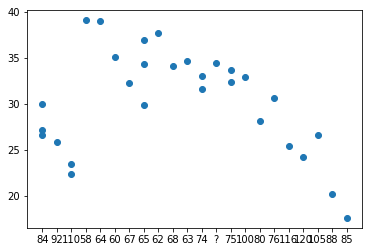

In [61]:
Auto = pd.read_csv("Auto.csv")

data = Auto[Auto['year'].isin([81])]
mpg = data['mpg']
horsepower = data['horsepower'].to_numpy()
plt.scatter(horsepower, mpg)


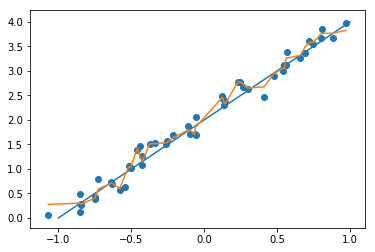

In [41]:
from scipy.stats import uniform, norm
from sklearn.neighbors import KNeighborsRegressor
def f(x):
    return 2 + 2 * x

f = np.vectorize(f)

x = np.linspace(-1, 1, 10)
y = f(x)

size=50
X = uniform(loc=-1, scale=2).rvs(size)
Y = f(X)
X = X + norm(scale=0.07).rvs(size)
X = X[:, np.newaxis]

n_neighbor = 2
knn = KNeighborsRegressor(n_neighbor, weights='uniform').fit(X, Y)
X_sorted = np.sort(X, axis=0)
Y_head = knn.predict(X_sorted)

plt.plot(x, y)
plt.scatter(X, Y)
plt.plot(X_sorted, Y_head)